# Traveling Salesman Problem (TSP)

### Datos del problema:
* Nodos: 5 ciudades (0, 1, 2, 3, 4).
* Objetivo: Encontrar la ruta más corta que visite todas las ciudades y regrese al inicio.


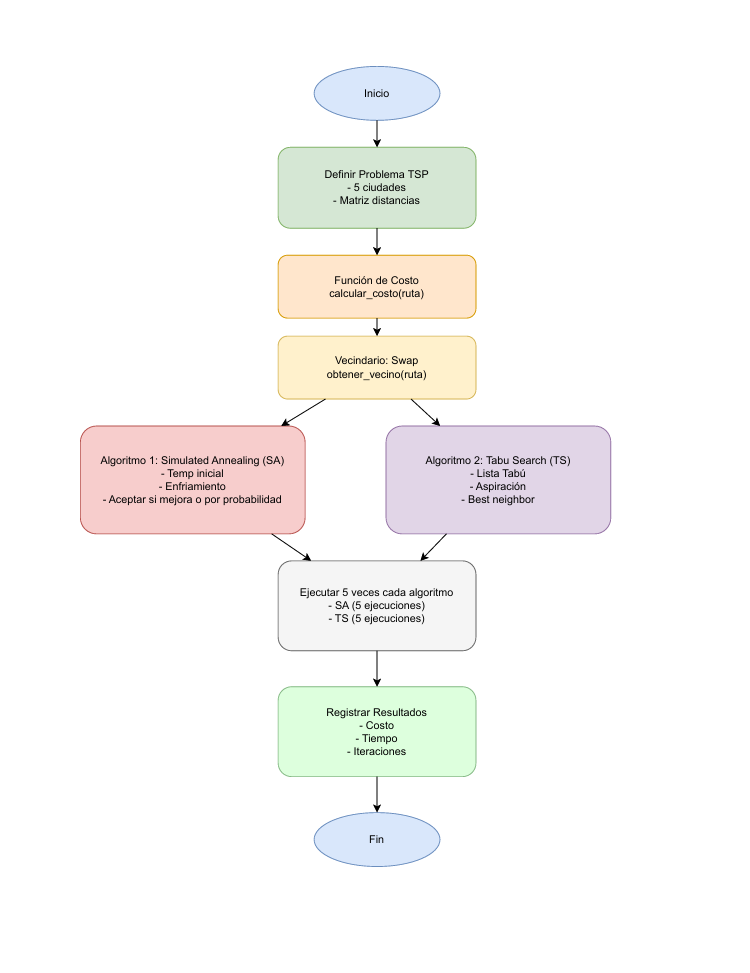

#  Implementación de algoritmos

In [8]:
import random
import math
import time
import copy

# --- Configuración del Problema (Matriz de Distancias Simétrica) ---
# Matriz 5x5 ficticia para el ejercicio
dist_matrix = [
    [0, 10, 15, 20, 10],
    [10, 0, 35, 25, 15],
    [15, 35, 0, 30, 20],
    [20, 25, 30, 0, 15],
    [10, 15, 20, 15, 0]
]

# --- Función de Costo ---
def calcular_costo(ruta):
    costo = 0
    for i in range(len(ruta) - 1):
        costo += dist_matrix[ruta[i]][ruta[i+1]]
    costo += dist_matrix[ruta[-1]][ruta[0]] # Regreso al inicio
    return costo

# --- Generar Vecindario (Swap) ---
def obtener_vecino(ruta):
    nueva_ruta = ruta[:]
    i, j = random.sample(range(len(ruta)), 2) # Elegir 2 índices al azar
    nueva_ruta[i], nueva_ruta[j] = nueva_ruta[j], nueva_ruta[i] # Intercambiar
    return nueva_ruta

# --- Algoritmo 1: Simulated Annealing (SA) ---
def simulated_annealing(ruta_inicial, max_iter=1000, temp_inicial=100, alpha=0.95):
    actual = ruta_inicial
    costo_actual = calcular_costo(actual)
    mejor_ruta = actual[:]
    mejor_costo = costo_actual
    
    temp = temp_inicial
    
    for i in range(max_iter):
        vecino = obtener_vecino(actual)
        costo_vecino = calcular_costo(vecino)
        
        delta = costo_vecino - costo_actual
        
        # Criterio de aceptación: Si mejora O si la probabilidad lo permite
        if delta < 0 or random.random() < math.exp(-delta / temp):
            actual = vecino
            costo_actual = costo_vecino
            
            if costo_actual < mejor_costo:
                mejor_ruta = actual[:]
                mejor_costo = costo_actual
        
        temp *= alpha # Enfriamiento
        
        if temp < 0.0001: # Parada temprana por temperatura
            break
            
    return mejor_costo, i + 1

# --- Algoritmo 2: Tabu Search (TS) ---
def tabu_search(ruta_inicial, max_iter=100, tabu_size=5):
    actual = ruta_inicial
    mejor_global = actual[:]
    costo_mejor = calcular_costo(mejor_global)
    
    lista_tabu = [] # Lista de movimientos prohibidos (simulada con rutas completas para simplicidad)
    
    for i in range(max_iter):
        vecinos = []
        # Generamos 10 vecinos y elegimos el mejor que no sea tabú
        for _ in range(10):
            v = obtener_vecino(actual)
            vecinos.append(v)
        
        vecinos.sort(key=calcular_costo) # Ordenar por mejor costo
        
        mejor_vecino_local = None
        
        for v in vecinos:
            costo_v = calcular_costo(v)
            # Aceptamos si no es tabú O si cumple criterio de aspiración (es mejor que el global)
            if v not in lista_tabu or costo_v < costo_mejor:
                mejor_vecino_local = v
                break
        
        if mejor_vecino_local:
            actual = mejor_vecino_local
            costo_act = calcular_costo(actual)
            
            if costo_act < costo_mejor:
                mejor_global = actual[:]
                costo_mejor = costo_act
            
            lista_tabu.append(actual)
            if len(lista_tabu) > tabu_size:
                lista_tabu.pop(0)
    
    return costo_mejor, max_iter

# Ejecución y resultados 

In [9]:
# --- Ejecución y Resultados ---
print(f"{'Algoritmo':<10} | {'Ejecución':<9} | {'Costo':<6} | {'Tiempo (s)':<10} | {'Iteraciones':<11}")
print("-" * 60)

semilla_ruta = [0, 1, 2, 3, 4] # Nodos iniciales

for algo_name, algo_func in [("SA", simulated_annealing), ("TS", tabu_search)]:
    for run in range(1, 6): # 5 ejecuciones
        start_time = time.time()
        
        # Mezclamos la ruta inicial para cada ejecución para dar variedad
        ruta_run = semilla_ruta[:]
        random.shuffle(ruta_run)
        
        costo, iters = algo_func(ruta_run)
        
        end_time = time.time()
        tiempo_total = end_time - start_time
        
        print(f"{algo_name:<10} | {run:<9} | {costo:<6} | {tiempo_total:.6f}   | {iters:<11}")

Algoritmo  | Ejecución | Costo  | Tiempo (s) | Iteraciones
------------------------------------------------------------
SA         | 1         | 85     | 0.000997   | 270        
SA         | 2         | 85     | 0.000999   | 270        
SA         | 3         | 85     | 0.002148   | 270        
SA         | 4         | 85     | 0.001011   | 270        
SA         | 5         | 85     | 0.001987   | 270        
TS         | 1         | 85     | 0.004510   | 100        
TS         | 2         | 85     | 0.005555   | 100        
TS         | 3         | 85     | 0.004518   | 100        
TS         | 4         | 85     | 0.005012   | 100        
TS         | 5         | 85     | 0.003999   | 100        


# Análisis comparativo

## Tabla de resultados

| Algoritmo | Ejecución | Costo (Fitness) | Tiempo (s) | Iteraciones |
|-----------|-----------|------------------|------------|-------------|
| SA | 1 | 85 | 0.000997 | 270 |
| SA | 2 | 85 | 0.000999 | 270 |
| SA | 3 | 85 | 0.002148 | 270 |
| SA | 4 | 85 | 0.001011 | 270 |
| SA | 5 | 85 | 0.001987 | 270 |
| **Promedio SA** | - | **85** | **0.001428** | **270** |
| TS | 1 | 85 | 0.004510 | 100 |
| TS | 2 | 85 | 0.005555 | 100 |
| TS | 3 | 85 | 0.004518 | 100 |
| TS | 4 | 85 | 0.005012 | 100 |
| TS | 5 | 85 | 0.003999 | 100 |
| **Promedio TS** | - | **85** | **0.004719** | **100** |


## A. Precisión (Calidad)

Hubo un empate. Debido a que el espacio de búsqueda era pequeño, tanto el algoritmo **SA** como el **TS** lograron identificar el **óptimo global (costo 85)** en el 100% de las ejecuciones.

## B. Eficiencia (Velocidad)

El **Simulated Annealing (SA)** es el ganador, siendo casi tres veces más rápido que TS.  
Aunque Tabu Search (TS) necesitó menos iteraciones totales, su carga computacional es mayor:  
- por cada paso debe evaluar múltiples vecinos y  
- consultar la lista tabú,  

mientras que **SA** evalúa solo una opción por iteración, siendo más ligero y ágil.

## C. Robustez (Estabilidad)

Ambos algoritmos fueron perfectamente confiables en cuanto a la calidad del resultado: siempre llegaron a la misma solución sin importar la semilla.  

Sin embargo:  
- **TS** fue más **estable en tiempo**, mostrando variaciones mínimas entre ejecuciones.  
- **SA** tuvo ligeras variaciones temporales debidas al sistema operativo, aunque sin afectar la calidad final.
